In [1]:
import pandas as pd
import numpy as np
import arviz as az

In [2]:
df_peru = pd.read_excel(r'alldatasets.xlsx',sheet_name='Peru')

In [3]:
df_peru.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,timeschool,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn,earn_usd
0,PE018001,Peru,154.000000,0.0,12.0,-0.239376,5.0,NaN,7.0,0,98,5,0.558814,5,1,700,207.403626
1,PE018002,Peru,163.000000,0.0,15.5,-0.244915,10.0,4.0,12.0,1,94,4,0.615497,2,1,0,0.000000
2,PE018004,Peru,157.000000,0.0,7.0,-0.143035,15.0,NaN,12.0,0,90,5,0.428947,5,1,400,118.516357
3,PE018005,Peru,156.500000,0.0,7.0,0.375651,30.0,0.0,9.0,0,91,4,0.337719,5,1,700,207.403626
4,PE018006,Peru,160.100006,0.0,12.0,0.435034,15.0,10.0,12.0,0,93,4,0.537803,5,1,1400,414.807251


In [4]:
df_peru.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'timeschool', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1',
       'hhsizer1', 'wi_newr1', 'job_cat', 'pvt_sector', 'earn', 'earn_usd'],
      dtype='object')

In [5]:
from scipy import stats
import scipy.stats as stats

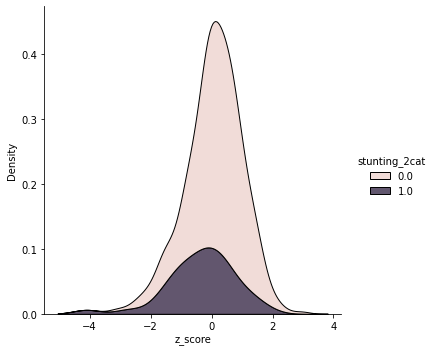

In [6]:
import seaborn as sns
sns.displot(df_peru, x="z_score", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [7]:
Y = df_peru[['height']]
X = df_peru[['stunting_2cat']]

In [8]:
formula = 'height ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'height ~ stunting_2cat'

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=153.2, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=6.7)        
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_peru, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=3000, chains = 2, tune = 4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, stunting_2cat, Intercept]


Sampling 2 chains for 4_000 tune and 3_000 draw iterations (8_000 + 6_000 draws total) took 21 seconds.


In [11]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,161.571,0.426,160.775,162.350,0.006,0.004,4770.0,4770.0,4764.0,4317.0,1.0
stunting_2cat,-6.193,0.816,-7.679,-4.637,0.012,0.008,4675.0,4675.0,4674.0,4208.0,1.0
sd,7.767,0.264,7.302,8.279,0.003,0.002,6292.0,6292.0,6237.0,3720.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

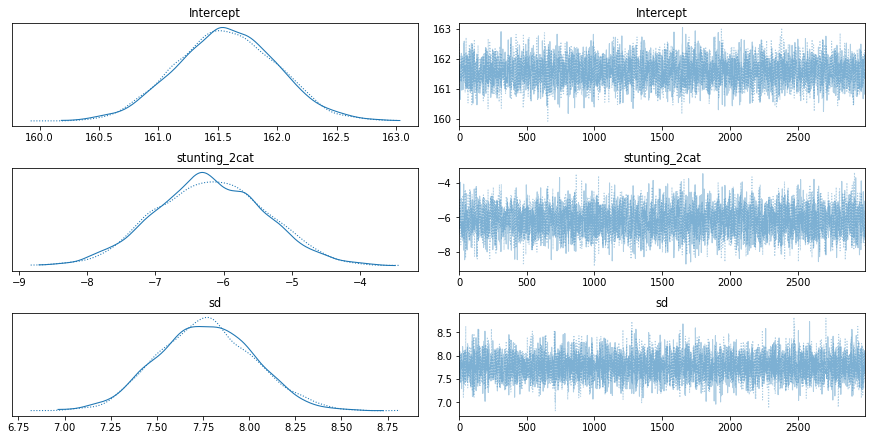

In [12]:
az.plot_trace(normal_trace)

In [13]:
Y = df_peru['height']
X = df_peru[['stunting_2cat', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1','wi_newr1',
       'hhsizer1']]

In [14]:
formula = 'height ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'height ~ stunting_2cat + agegapr1 + momeduyrsr1 + chsexr1 + agemonr1 + wi_newr1 + hhsizer1'

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=153.2, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=6.7),
        'agegapr1': pm.Normal.dist(mu=1, sigma=6.7),
        'momeduyrsr1': pm.Normal.dist(mu=1, sigma=6.7),
        'chsexr1': pm.Normal.dist(mu=1, sigma=6.7),
        'agemonr1': pm.Normal.dist(mu=1, sigma=6.7),
        'wi_newr1': pm.Normal.dist(mu=1, sigma=6.7),
        'hhsizer1': pm.Normal.dist(mu=1, sigma=6.7)
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_peru, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=10000, chains = 2, tune = 2000,target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, hhsizer1, wi_newr1, agemonr1, chsexr1, momeduyrsr1, agegapr1, stunting_2cat, Intercept]


Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 154 seconds.


In [17]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,149.288,5.167,139.597,158.976,0.044,0.031,14011.0,14011.0,14050.0,12211.0,1.0
stunting_2cat,-6.058,0.634,-7.294,-4.911,0.004,0.003,21736.0,21481.0,21751.0,13323.0,1.0
agegapr1,0.018,0.064,-0.102,0.139,0.000,0.000,21419.0,9128.0,21411.0,13397.0,1.0
momeduyrsr1,0.029,0.078,-0.123,0.169,0.001,0.001,15603.0,11208.0,15601.0,14156.0,1.0
chsexr1,11.440,0.547,10.425,12.460,0.004,0.003,20062.0,19990.0,20079.0,13634.0,1.0
agemonr1,0.059,0.054,-0.040,0.164,0.000,0.000,14078.0,11548.0,14093.0,12362.0,1.0
wi_newr1,1.863,1.402,-0.869,4.411,0.011,0.008,17321.0,14709.0,17339.0,14656.0,1.0
hhsizer1,-0.100,0.155,-0.386,0.190,0.001,0.001,21560.0,11926.0,21554.0,14884.0,1.0
sd,4.954,0.190,4.607,5.318,0.001,0.001,21439.0,21244.0,21687.0,13040.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'agegapr1'}>,
        <AxesSubplot:title={'center':'agegapr1'}>],
       [<AxesSubplot:title={'center':'momeduyrsr1'}>,
        <AxesSubplot:title={'center':'momeduyrsr1'}>],
       [<AxesSubplot:title={'center':'chsexr1'}>,
        <AxesSubplot:title={'center':'chsexr1'}>],
       [<AxesSubplot:title={'center':'agemonr1'}>,
        <AxesSubplot:title={'center':'agemonr1'}>],
       [<AxesSubplot:title={'center':'wi_newr1'}>,
        <AxesSubplot:title={'center':'wi_newr1'}>],
       [<AxesSubplot:title={'center':'hhsizer1'}>,
        <AxesSubplot:title={'center':'hhsizer1'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

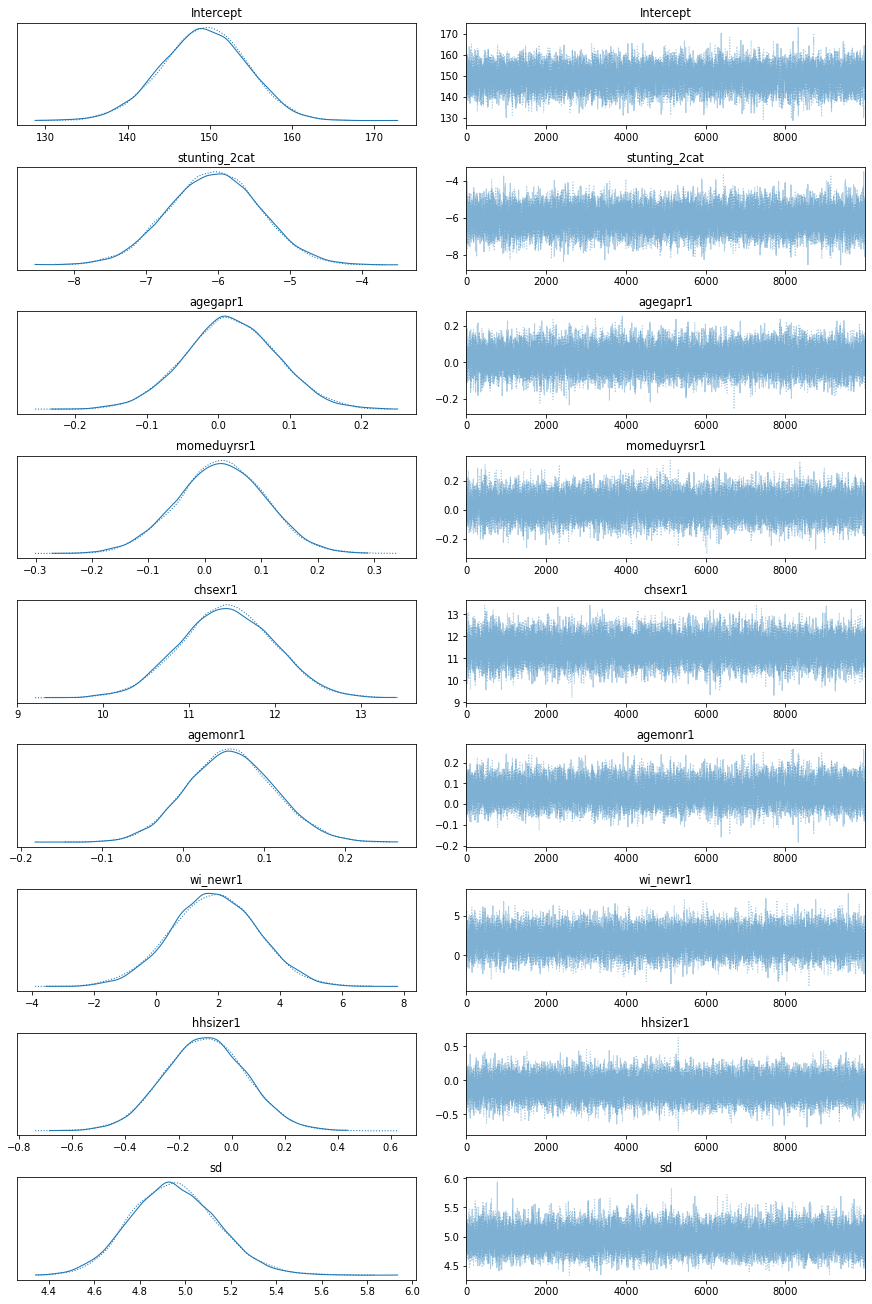

In [18]:
az.plot_trace(normal_trace)

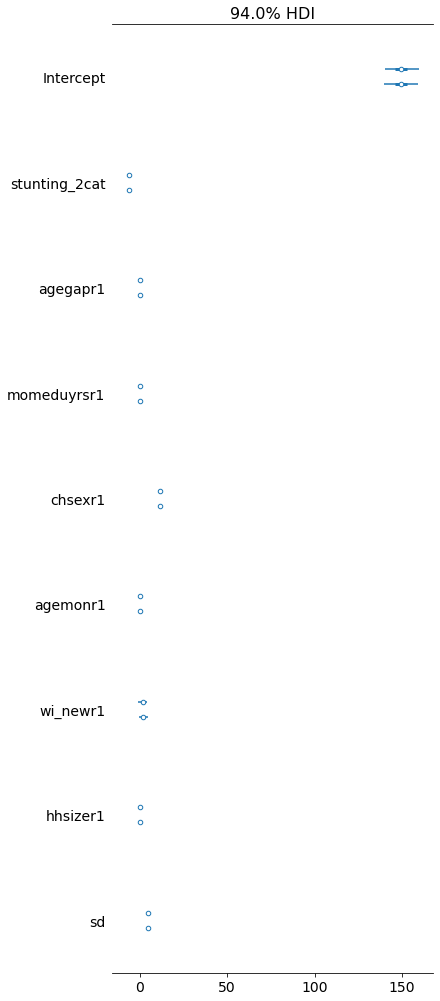

In [19]:
az.plot_forest(normal_trace);